<a href="https://colab.research.google.com/github/gueyeAbdoul/Projet_SE/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **k plus proches voisins - k nearest neighbours**

On abbregera k-plus proches voisins avec k-ppv

## Exercice 1
A tracer sur papier.

On a les quatre points suivants:

|Nom| coordonnées |
|---| --- |
| A | (1,1)|
| B | (1,3)|
| C | (-1,2) |
| D | (-2,0) |

 Tracer la frontière de décision pour le 1 - plus proche voisin


## Exercice 2

On a les données ci-dessous avec 9 observations, les classes sont données dans le vecteur $Y$ et les attributs sont donnés dans le vecteur $X$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-4, 0], [-3,1], [-3, 0], [-3,-1], [-0.9, 0], [1,0], [2.2,1], [2.2,0], [2.2, -1]])
Y = np.array([1,1,1,1,1,2,2,2,2])


1. Générez le graphique des données.


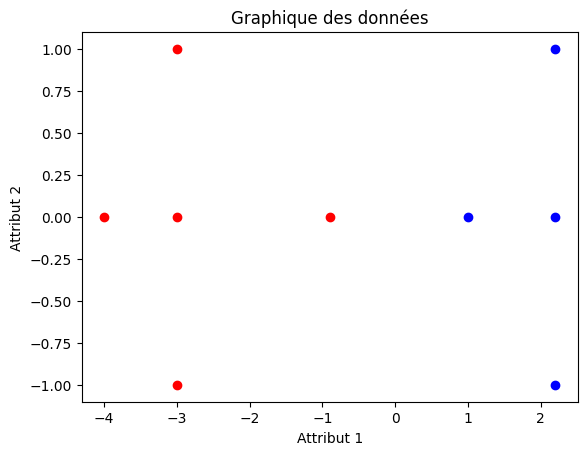

In [3]:
def plot_data(X, Y):
    class_1 =X[Y==1]
    class_2 =X[Y==2]
    plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Classe 1')
    plt.scatter(class_2[:, 0], class_2[:, 1], c='blue', label='Classe 2')
    plt.xlabel('Attribut 1')
    plt.ylabel('Attribut 2')

    plt.title('Graphique des données')

plot_data(X,Y)
plt.show()

2. Ecrivez une fonction kppv(X, Y, k, obs) qui prend les données $X$ et leurs classes $Y$, la valeur de $k$ et une nouvelle observation $obs$ dont on ne connait pas la classe. La fonction retourne la prédiction de l'algorithme du k-ppv pour la nouvelle observation $obs$.
Pour simplifier, on supposera qu'il y a seulement deux attributs et que la distance est la distance euclidienne.

Notez que numpy possède une fonction pour trier (voir exemple ci-dessous), et surtout pour récupérer la permutation de tri. Si vous avez un vecteur $v$, au lieu de récupérer le vecteur trié $v_{ord}$, vous pouvez obtenir le vecteur d'index $\sigma$ tel que $v[\sigma[i]] = v_{ord[i]}$.

Une dernière fonction utile, la fonction `unique` du module `numpy` vous permet de trouver les valeurs uniques qui se trouvent dans un vecteur. De plus, grace à l'option `return_counts=True`, vous pouvez aussi récupérer le nombre d'occurrence de chaque valeur.


In [4]:
v = np.array([6,3,4,2,1,5])
# retourne les données triées
tv= np.sort(v)
print("données triées:", tv)
# attention! Les données originelles n'ont pas changé!
print("données de départ: ", v)
# on peut aussi avoir la permutation pour trier le vecteur
sigma = np.argsort(v)
print("permuation sigma=",sigma)
print("l'élément le plus petit est celui qui a l'index", sigma[0], "dans le vecteur original")
print("l'élément le plus grand est celui qui a l'index", sigma[len(v)-1], "dans le vecteur original")
v=np.array([1, 2, 3, 2, 1, 2, 3, 1, 3, 2, 1])
val, count = np.unique(v, return_counts=True)
print("éléments unique de v:", val,  " nombre d'occurrences: ", count)

données triées: [1 2 3 4 5 6]
données de départ:  [6 3 4 2 1 5]
permuation sigma= [4 3 1 2 5 0]
l'élément le plus petit est celui qui a l'index 4 dans le vecteur original
l'élément le plus grand est celui qui a l'index 0 dans le vecteur original
éléments unique de v: [1 2 3]  nombre d'occurrences:  [4 4 3]


In [37]:
def kppv(X, Y, k, obs):
    distances = np.sqrt(np.sum((X - obs)**2, axis=1))
    print(distances)
    indices = np.argsort(distances)
    print(indices)
    voisins = Y[indices[:k]]
    print(voisins)
    val, count= np.unique(voisins, return_counts=True)
    predict = val[count.argmax()]
    return predict

In [38]:
obs = np.array([3,4])
k = 3

predict = kppv(X, Y, k, obs)
print("Prediction :", predict)

[8.06225775 6.70820393 7.21110255 7.81024968 5.58659109 4.47213595
 3.10483494 4.07921561 5.06359556]
[6 7 5 8 4 1 2 3 0]
[2 2 2]
Prediction : 2


Text(0.5, 1.0, 'Graphique des données + obs')

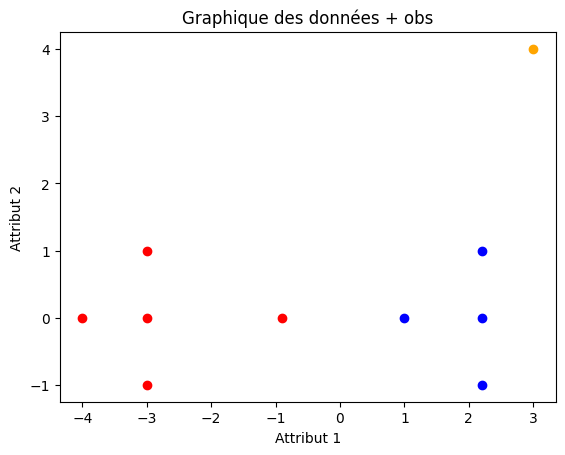

In [39]:
# Visualisation du point obs
class_1 = X[Y==1]
class_2 = X[Y==2]
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Classe 1')
plt.scatter(class_2[:, 0], class_2[:, 1], c='blue', label='Classe 2')
plt.scatter(obs[0], obs[1], c='orange')
plt.xlabel('Attribut 1')
plt.ylabel('Attribut 2')
plt.title('Graphique des données + obs')

3. Testez maintenant sur le petit jeu de données que vous avez visualisez dans la l'exercice 1. Prenez chaque observation individuellement et traitez la comme une nouvelle observation. Pour chaque observation, quelle serait la classification donnée par 1-$ppv$ et 3-$ppv$?
4. Quelle est la classification prédite pour le point (0,0) avec 1-ppv et 3-ppv?

In [40]:
# point (0,0)
obs = np.array([0,0])
k = 3

predict = kppv(X, Y, k, obs)
print("Prediction :", predict)

[4.         3.16227766 3.         3.16227766 0.9        1.
 2.41660919 2.2        2.41660919]
[4 5 7 6 8 2 1 3 0]
[1 2 2]
Prediction : 2


In [41]:
# point (0,0)
obs = np.array([0,0])
k = 3

predict = kppv(X, Y, k, obs)
print("Prediction :", predict)

[4.         3.16227766 3.         3.16227766 0.9        1.
 2.41660919 2.2        2.41660919]
[4 5 7 6 8 2 1 3 0]
[1 2 2]
Prediction : 2


Text(0.5, 1.0, 'Graphique des données + obs')

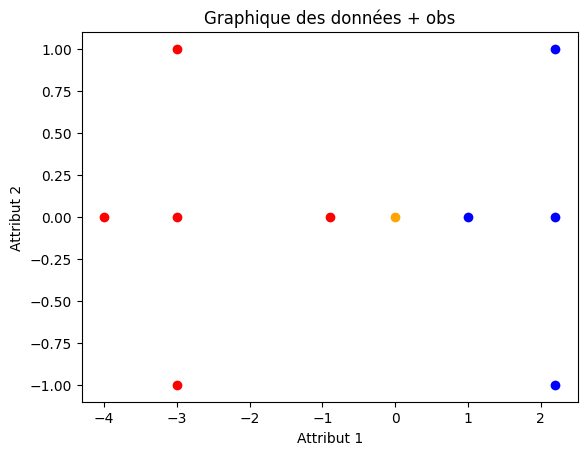

In [42]:
# Visualisation du point (0,0)
class_1 = X[Y==1]
class_2 = X[Y==2]
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Classe 1')
plt.scatter(class_2[:, 0], class_2[:, 1], c='blue', label='Classe 2')
plt.scatter(obs[0], obs[1], c='orange')
plt.xlabel('Attribut 1')
plt.ylabel('Attribut 2')
plt.title('Graphique des données + obs')

## Exercice 3

### Données Iris et `scikit learn`

On va maintenant utilisée une base de données classique pour tester cette méthode, c'est la
[La base de données Iris](https://archive.ics.uci.edu/ml/datasets/iris) vue au précédent TP qui contient des données sur 150 fleurs d'iris.

On va de plus utiliser une bibliothèque appelée [`scikit learn`](https://scikit-learn.org/stable/) pour faire du machine learning qui contient beaucoup d'algorithmes, dont tous ceux que l'on verra en cours cette année. C'est une bibliothèque très utilisée aussi dans l'industrie.

La bibliothèque utilise une approche orientée objet: l'algorithme des `k`-plus proches voisins est une instance d'algorithme de classification.

Ci-dessous, on charge pour vous la base de données `Iris`. On va travailler pour le moment avec les attributs des colonnes 2 et 3, mais on pourra tester d'autres paires d'attributs par la suite.

In [43]:
from sklearn.datasets import load_iris
Xcomplet, y = load_iris(return_X_y=True)
print("Nom des classes: ", np.unique(y))
print("Nombre d'observations dans chacune des classes:", np.bincount(y))
print("Il y a ", Xcomplet.size, " observations avec ", Xcomplet[0].size, " attributs")
X=Xcomplet[:,[2,3]]
# on travaille ici avec les colonnes 2 et 3, on pourra changer cela.

Nom des classes:  [0 1 2]
Nombre d'observations dans chacune des classes: [50 50 50]
Il y a  600  observations avec  4  attributs


On met en place l'algorithme des $k$-plus proches voisins implémenté dans la librairie `scikit-learn`. Notez qu'ici, on initialise avec $k=5$ et la distance est la distance euclidienne. Notez que pour le moment, l'algorithme n'a pas été "entrainé" puisqu'on n'a pas encore spécifié de données.

En fait, on a créé une instance de la classe KNeighborsClassifier, qui est une sous classe de la classe qui représente les problèmes de classification. Cette classe possède deux méthodes: fit(X, y) et predict(T).

In [44]:
from sklearn.neighbors import KNeighborsClassifier
kppv = KNeighborsClassifier(n_neighbors=5,  metric='euclidean')

1. Tracez le graphique montrant tous les points de la base. Utilisez une couleur différente et un symbole différent pour représenter les points de chacune des classes.
2. Utilisez la méthode fit pour "entrainer" l'algorithme, et utilisez la méthode prédict pour tester quelques observations "à la main". N'hésitez pas à consulter la documentation de scikit-learn si vous avez besoin.

Text(0.5, 1.0, 'Graphique des données IRIS')

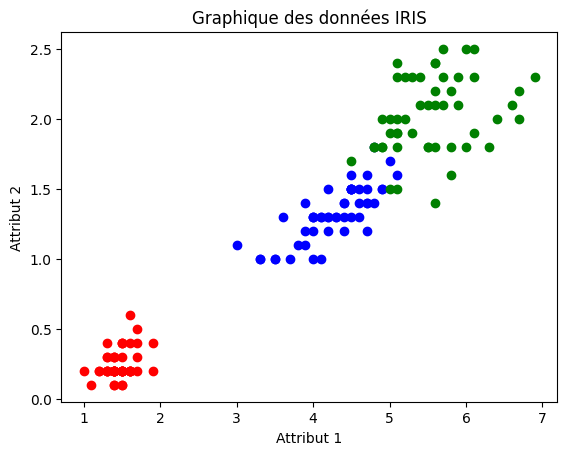

In [46]:
# Visualisation : à compléter
X0= X[y==0]
X1= X[y==1]
X2= X[y==2]

plt.scatter(X0[:, 0], X0[:, 1], c='red', label='Classe 0')
plt.scatter(X1[:, 0], X1[:, 1], c='blue', label='Classe 1')
plt.scatter(X2[:, 0], X2[:, 1], c='green', label='Classe 2')
plt.xlabel('Attribut 1')
plt.ylabel('Attribut 2')
plt.title('Graphique des données IRIS')

In [51]:
#Entrainer le modele
kppv.fit(X, y)




KNeighborsClassifier(metric='euclidean')

In [53]:
classes={0:'setosa', 1:'versicolor', 2:'virginica'}

In [54]:
# tester le modele
# Faire la prédiction, ensuite afficher le nom de la fleur
Xnew=[[3.0, 1.0]]
y_predict= kppv.predict(Xnew)
print(classes[y_predict[0]])

versicolor


In [64]:
# tester le modele
# Faire la prédiction, ensuite afficher le nom de la fleur
Xnew=[[3.0, 2.0]]
y_predict= kppv.predict(Xnew)
print(classes[y_predict[0]])

versicolor


In [56]:
# tester le modele
# Faire la prédiction, ensuite afficher le nom de la fleur
Xnew=[[1.0, 1.0]]
y_predict= kppv.predict(Xnew)
print(classes[y_predict[0]])

setosa


On vous donne ci-dessous le code d'une méthode pour générer le graphique des régions de décisions. La stratégie est de demander à l'algorithme de classification la classification pour tous les points d'une grille et de générer les régions avec les prédictions.

In [59]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('d', 's', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

3. Utilisez la fonction plot_decision_regions codée ci-dessous pour visualiser la surface de décision.
4. Changez la valeur de $k$ et observez les changements de la surface de décision.
5. On peut aussi travailler avec d'autres distances. Vous trouverez les distances disponibles sur [ce lien](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#). Utilisez la distance de manhattan et observez les changements de la surface de décisions avec plusieurs valeurs de $k$.

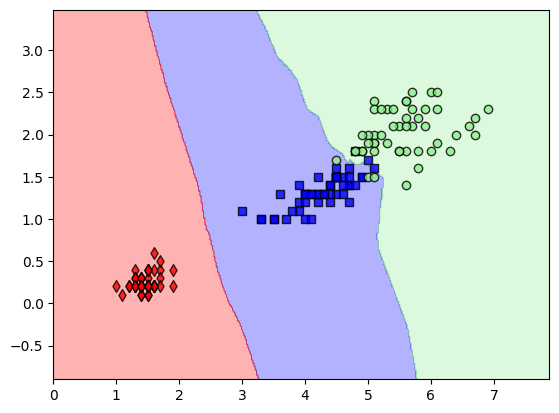

In [60]:
plot_decision_regions(X, y, kppv)
